# Imports

In [92]:
import os
import numpy as np
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generacion de datos de entrada
Suponiendo que llegan precios de 0 a inf, y calidad de 0 / 100
- Precio relativo calculado dependiendo del precio maximo y el minimo, siendo el minimo 0 y el maximo 1.
- Calidad dividida entre 100

In [93]:
non_formatted_x = []
non_formatted_y = []

MAX_PRICE = 1000
NUM = 1000
# Si el precio relativo es menor o igual a 6
# Si la calidad es mayor o igual a 0.7

# Generar datos
for i in range(NUM):
    random_price = np.random.random() * MAX_PRICE
    random_quality = np.random.random() * 100
    non_formatted_x.append([random_price, random_quality])

# Sacar minimo y maximo
max_price = max([x[0] for x in non_formatted_x])
min_price = min([x[0] for x in non_formatted_x])

# Formatear los datos y generar las etiquetas
for i in range(NUM):
    non_formatted_x[i][0] = (non_formatted_x[i][0] - min_price) / (
        max_price - min_price
    )
    non_formatted_x[i][1] = non_formatted_x[i][1] / 100
    if non_formatted_x[i][0] <= 0.6 and non_formatted_x[i][1] >= 0.7:
        non_formatted_y.append(1)
    else:
        non_formatted_y.append(0)

X = np.array(non_formatted_x)
print(X[:5])
y = np.array(non_formatted_y)
print(y[:5])

[[0.51175247 0.2424844 ]
 [0.26849513 0.68835158]
 [0.11174087 0.42159489]
 [0.13768857 0.95626672]
 [0.63887325 0.11858668]]
[0 0 0 1 0]


# Division entre datos de entrenamiento y datos de test.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Red neuronal

In [95]:
model = Sequential(
    [
        # Dense(1, input_dim=2, activation="sigmoid"),
        Dense(4, input_dim=2, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

c:\Users\David\ia\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilacion del modelo

In [96]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenamiento del modelo

In [97]:
MODEL_PATH = os.path.join(
    os.getcwd(),
    "model.h5",
)
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
model.save(MODEL_PATH)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7269 - loss: 0.6456  
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.5602  
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8151 - loss: 0.5000
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8232 - loss: 0.4535
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8245 - loss: 0.4235
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8132 - loss: 0.4107
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8060 - loss: 0.3969
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8040 - loss: 0.3869
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8232 - loss: 0.3651
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.3467  
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8442 - loss: 0.3387
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0

# Pruebas con datos dados

In [98]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy:.2f}%")
predict = model.predict(X_test)
for i in range(len(predict)):
    pred_label = 1 if predict[i][0] >= 0.5 else 0
    print(f"Real: {y_test[i]}, Predicción: {pred_label}")

Accuracy: 0.91%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Real: 1, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 1
Real: 1, Predicción: 1
Real: 1, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 0
Real: 0, Predicción: 0
Real: 1, Predicción: 0
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Rea

# Pesos

In [99]:
weights = model.get_weights()
for i, weight in enumerate(weights):
    print(f"Peso {i}:")
    print(weight)

Peso 0:
[[-0.76026815  1.2898455   1.0624965  -0.1392936 ]
 [ 2.1001441  -0.83683854 -1.2004449   1.6489621 ]]
Peso 1:
[-0.42771605  1.053736    1.2063589  -0.5345737 ]
Peso 2:
[[ 3.0484774]
 [-2.0369666]
 [-2.740149 ]
 [ 2.1008523]]
Peso 3:
[-0.9045843]


# Sesgo

In [100]:
# Obtener los pesos del modelo
weights = model.get_weights()

sesgo = weights[-1]
print("Sesgo del modelo:", sesgo)

Sesgo del modelo: [-0.9045843]


# Grafica


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


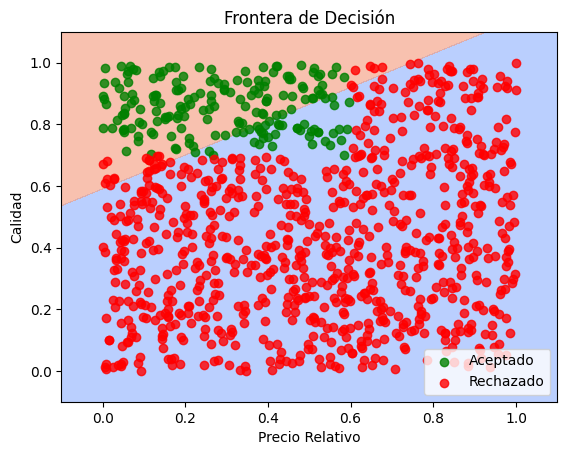

In [101]:
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1  # Rango para el precio relativo
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1  # Rango para la calidad

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)
)

# Crear un arreglo de puntos en la malla
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Predecir la clase para cada punto en la malla
predictions = model.predict(grid_points)
predictions = predictions.reshape(xx1.shape)

# Graficar la frontera de decisión
plt.contourf(xx1, xx2, predictions, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")

# Graficar los datos originales
accepted = y == 1
rejected = y == 0

plt.scatter(X[accepted, 0], X[accepted, 1], color="green", label="Aceptado", alpha=0.8)
plt.scatter(X[rejected, 0], X[rejected, 1], color="red", label="Rechazado", alpha=0.8)

# Etiquetas y leyenda
plt.title("Frontera de Decisión")
plt.xlabel("Precio Relativo")
plt.ylabel("Calidad")
plt.legend()
plt.show()

# Respuestas
- Los datos son linealmente separables
- Como podemos mejorar.
  - Metiendo más epocas.
  - Implementando mas capas ocultas.
  - Yo considero que al menos en estos casos no es muy necesario hacer una red.